<a href="https://colab.research.google.com/github/seismomat/IBEM/blob/Lili/EjercicioIBEM_Corregido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la
import scipy.special as scis

In [10]:
#Definición de parámetros del problema:
f = 0.5 # Hertz
w = 2*np.pi*f # rad/s
beta = 0.3 # km/s
lambd = beta/f # long de onda en kilometros
k = w / beta # 1/km

#División de segmentos:
ns=3 #número de segmentos
x=np.linspace(0,2,ns+1)
y=np.zeros(ns+1)

#Puntos medios:
dx=x[1]-x[0]

xp=x+dx/2
yp=y

#Receptor:
xx=2.5
yy=0

print(xp)

[0.33333333 1.         1.66666667 2.33333333]


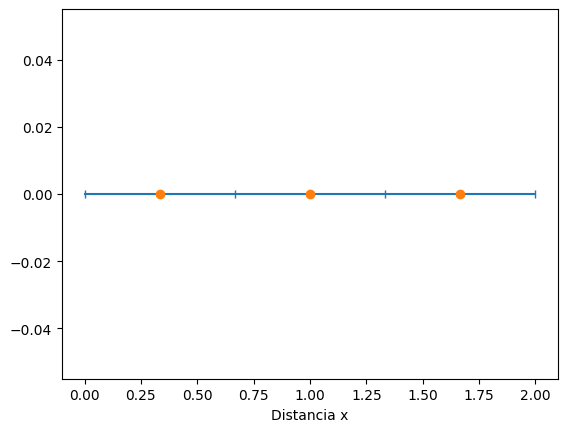

In [11]:
#Gráfica de geometría:

plt.plot(x,y,marker = '|')
plt.plot(xp[0:ns],yp[0:ns],'o')
#plt.plot(xx,yy,marker = 'v')

plt.xlabel('Distancia x')

plt.show()

El sistema que se va a hacer es:

\begin{equation}
  \begin{bmatrix}
    t_{22}(x_1,ξ_1) & t_{22}(x_1,ξ_2) & t_{22}(x_1,ξ_{3}) \\
    t_{22}(x_2,ξ_1) & t_{22}(x_2,ξ_2) & t_{22}(x_2,ξ_{3}) \\
    t_{22}(x_{3},ξ_1) & t_{22}(x_{3},ξ_2) & t_{22}(x_{3},ξ_{3})
  \end{bmatrix}
  \begin{bmatrix}
    ϕ_2(\xi_1) \\
    ϕ_2(\xi_2) \\
    ϕ_2(\xi_{3})
  \end{bmatrix}
  =
  \begin{bmatrix}
    -t_2^{(0)}(x_1) \\
    -t_2^{(0)}(x_2) \\
    -t_2^{(0)}(x_{3})
  \end{bmatrix}
\end{equation}

Cada $t_{22}$ se construye como:

\begin{equation}
  \int_{ξ-\frac{(x_2-x_1)}{2}}^{ξ+\frac{(x_2-x_1)}{2}} T_{22}(x,\xi)dS_ξ
\end{equation}

siendo $T_{22}$:

\begin{equation}
  T_{22}=\frac{i}{4r}D(kr) γ_k η_k
\end{equation}

In [12]:
#FUNCIONES:

def Funcion(x,xi,k):
  r=la.norm(x-xi)
  hank=scis.hankel2(1,k*r)
  gamma=(x-xi)/r
  It22=(1j/4)*(k*hank*gamma)
  return It22

def IntegralX(ix,ixi,k):
  # Cuadratura gaussiana de 5 puntos
  nodes = [-0.906179845938664, -0.538469310105683,0, 0.538469310105683, 0.906179845938664]
  weights = [0.236926885056189, 0.478628670499366, 0.568888888888889, 0.478628670499366, 0.236926885056189]

  #Para coordenada X:
  # Definición de los límites de integración
  ax = ixi[0]-((ixi[0]-ix[0])/2)  # Límite inferior
  bx = ixi[0]+((ixi[0]-ix[0])/2)  # Límite superior
  # Realiza la integración
  integralX = 0
  for i in range(len(nodes)):
    x_i = (bx - ax) / 2 * nodes[i] + (bx + ax) / 2
    integralX += weights[i] * Funcion(x_i,ixi,k)
  # Escala el resultado al intervalo de integración original
  integralX *= (bx - ax) / 2
  return integralX

def Eta(A,B):
  AB = B - A
  normal = np.array([AB[1], -AB[0]])
  normal = normal / la.norm(normal)
  return normal

def Int_T22(ix,ixi,k,A,B):
  normal=Eta(A,B)
  resultado1=IntegralX(ix,ixi,k)
  resultado=resultado1*normal
  return resultado

In [13]:
#Construcción de matriz de tracciones:

#Variable auxiliar t22:
t22=np.zeros((ns,ns))

for renglon in range(ns):
  for columna in range(ns):
    #Si se encuentra en la diagonal
    if renglon==columna:
      t22[renglon][columna]=0.5
    else:
      #Puntos centrales
      ix=np.array([xp[renglon],yp[renglon]])
      ixi=np.array([xp[columna],yp[columna]])
      #Para vector normal:
      A=np.array([x[renglon],y[renglon]])
      B=np.array([x[renglon+1],y[renglon+1]])
      aux=Int_T22(ix,ixi,k,A,B)
      t22[renglon][columna]=aux[1]

#Falta calcular la t2 y resolver sistema

print(t22)

[[ 0.5        -0.01053763  0.04177149]
 [ 0.16236888  0.5        -0.01563443]
 [ 0.35281138  0.01053763  0.5       ]]


<ipython-input-13-2b33606efb83>:19: ComplexWarning: Casting complex values to real discards the imaginary part
  t22[renglon][columna]=aux[1]


Calculo de $t_2^{(0)}$:

\begin{equation}
  T_{22}(x_1,x_R)
\end{equation}

El vector queda como:

\begin{equation}
  \begin{bmatrix}
    -T_{22}(x_1,x_R) \\
    -T_{22}(x_2,x_R) \\
    -T_{22}(x_{3},x_R)
  \end{bmatrix}
\end{equation}

In [14]:
#Variable auxiliar:
t2=[]

for i in range(ns):
  ix=np.array([xp[i],0])
  ixi=np.array([1,-1])
  A=np.array([x[i],y[i]])
  B=np.array([x[i+1],y[i+1]])
  normal=Eta(A,B)
  aux=-Funcion(ix,ixi,k)*normal
  t2.append(aux[1])

print(t2)

[(-0.36342990212460646-0.32939057556639106j), (0.6181934715565917-0.18951673978894606j), (-0.363429902124606-0.3293905755663918j)]


In [15]:
#Resolviendo el sistema:
solucion = np.linalg.solve(t22, t2)
print(len(solucion))
print(solucion)

3
[-0.67277433-0.64582457j  1.44602528-0.17554402j -0.28261029-0.199373j  ]


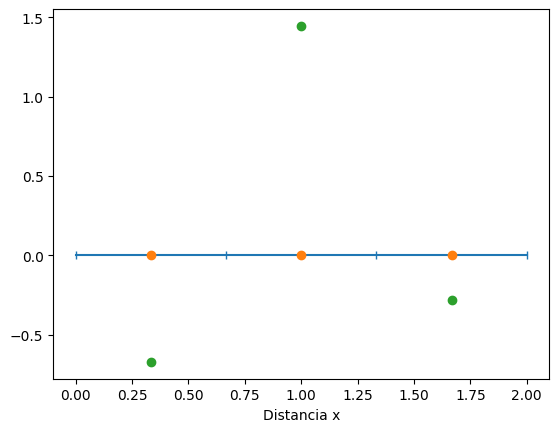

In [18]:
#Gráfica de geometría:

plt.plot(x,y,marker = '|')
plt.plot(xp[0:ns],yp[0:ns],'o')
#plt.plot(xx,yy,marker = 'v')
plt.plot(xp[0:ns],np.real(solucion),'o')

plt.xlabel('Distancia x')

plt.show()